In [68]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [87]:
# turn off 660,55 through 986,197
# turn off 341,304 through 638,850
# turn off 199,133 through 461,193
# toggle 322,558 through 977,958
# toggle 537,781 through 687,941

file_path = 'input.txt'
inp = ''
with open(file_path) as file:
    inp =  [line.rstrip().split() for line in file]

inp = [(el[-4], [int(i) for i in el[-3].split(',')], [int(i) for i in el[-1].split(',')] ) for el in inp]


print(inp[:10])

[('off', [660, 55], [986, 197]), ('off', [341, 304], [638, 850]), ('off', [199, 133], [461, 193]), ('toggle', [322, 558], [977, 958]), ('toggle', [537, 781], [687, 941]), ('on', [226, 196], [599, 390]), ('on', [240, 129], [703, 297]), ('on', [317, 329], [451, 798]), ('on', [957, 736], [977, 890]), ('on', [263, 530], [559, 664])]


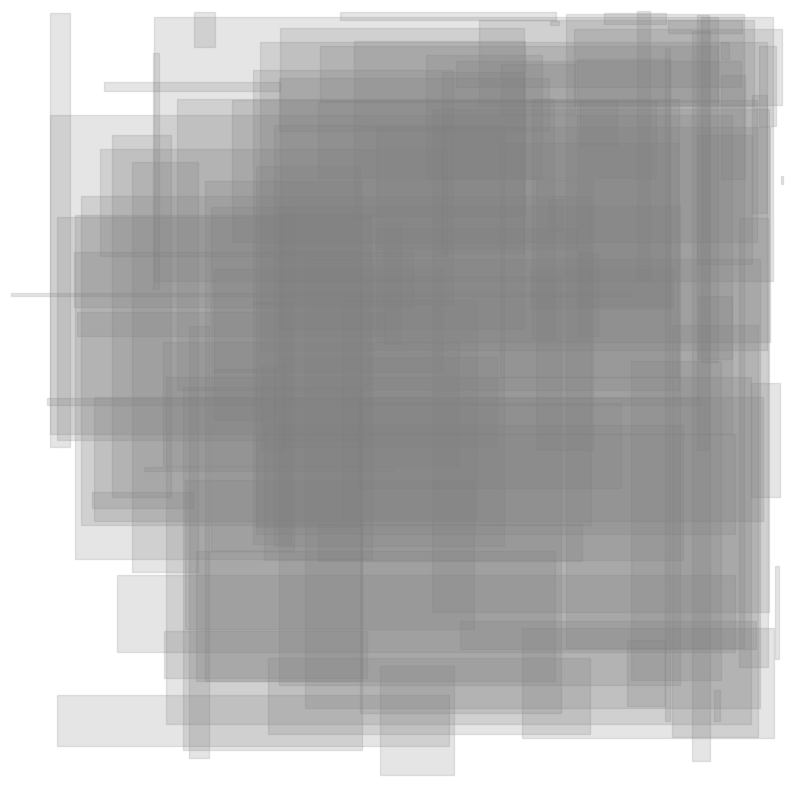

In [96]:



fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
ax.axis('off')

colors = {'on':'yellow', 'off':'black','toggle':'blue'}
for w, tl, br in inp[:100]:
    # Create a Rectangle patch
    rect = patches.Rectangle(tl, br[0]-tl[0], br[1]-tl[1], linewidth=1, edgecolor='gray', facecolor='gray', alpha=0.2)

    # Add the patch to the Axes
    ax.add_patch(rect)







In [ ]:
import numpy as np

size = 10


In [ ]:








create_mask(10, (0,0), (3,2), True)



rowmask 0 3
mask 0 2 2


array([[1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:


a = np.array([[1,1],[1,1]], dtype=bool)

a= toggle(a, (0,0),(1,1))
print(a)
a= toggle(a, (0,0),(2,1))
print(a)
a= toggle(a, (0,1),(2,2))
print(a)
# a= toggle([True, True, True, True, True, True, True, True, True, ], 2,5)
# print(a)
# a= toggle(a, 4,9)
# print(a)




[[False  True]
 [ True  True]]
[[ True False]
 [ True  True]]
[[ True False]
 [False False]]


In [161]:
grid = np.zeros((size, size))
grid[np.array(create_mask(size, (0,0),(size,size)), dtype=bool)] = 0
grid[np.array(create_mask(size, (2,2),(5,4)), dtype=bool)] = 1
grid

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

# Part 1

In [208]:
def create_mask(size, xy, xy1, value=1):
    def mask(size, rowm, start, end):
        
        
        # print('mask', start, end, end-start)

        end +=1
        mask = np.zeros((size, size))
        mask[start : end] = np.repeat([rowm], end-start, axis=0)
        return mask
    
    def rowmask(size, start, end, value=1):
        end+=1
        # print('rowmask', start, end)
        mask = np.zeros(size)
        mask[start:end] = value
        return mask

    return mask(
        size, 
        rowmask(
            size, 
            xy[0],
            xy1[0],
            value
        ), 
        xy[1],
        xy1[1]
    )

def toggle(grid, xy, xy1):
    def togglerow(row, start, end):
        end+=1

        row[start:end] = np.invert(np.array(row[start:end], dtype=bool))
        return row


    for i in range(xy[1], xy1[1]+1):
        grid[i] = togglerow(grid[i], xy[0], xy1[0])


    return grid


size = 1000
grid = np.zeros((size, size))


for action, xy, xy1 in inp:
    # print(action, xy,xy1)
    if action == 'off':
        grid[np.array(create_mask(size, xy,xy1), dtype=bool)] = 0
        continue
    if action == 'on':
        grid[np.array(create_mask(size, xy,xy1), dtype=bool)] = 1
        continue

    if action == 'toggle':
        grid = toggle(grid, xy, xy1)
        continue


print(grid)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


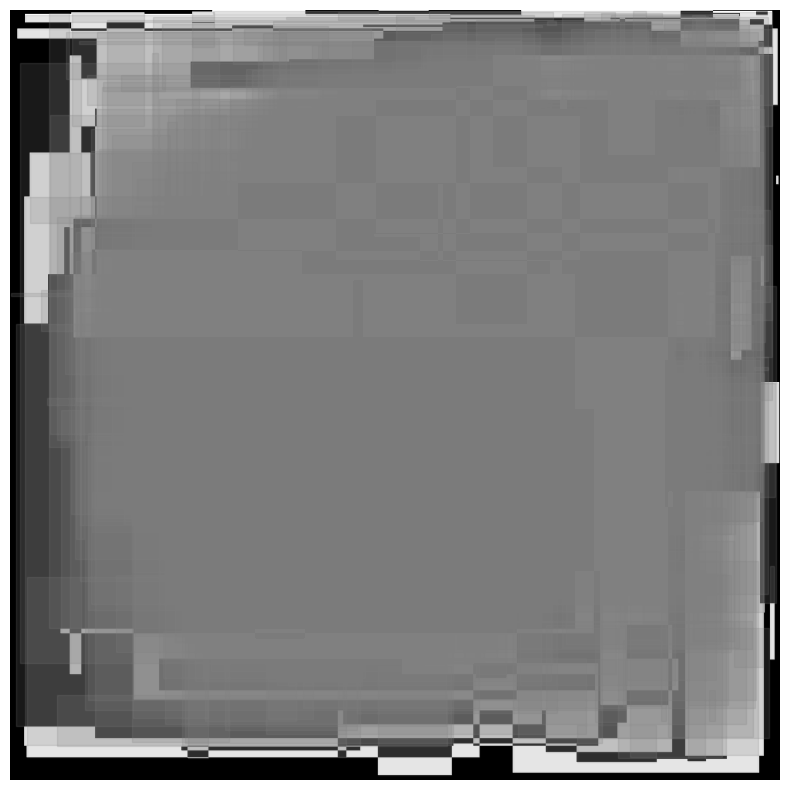

In [210]:


fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
ax.axis('off')

colors = {'on':'yellow', 'off':'black','toggle':'blue'}
for w, tl, br in inp:
    # Create a Rectangle patch
    rect = patches.Rectangle(tl, br[0]-tl[0], br[1]-tl[1], linewidth=1, edgecolor='gray', facecolor='gray', alpha=0.2)

    # Add the patch to the Axes
    ax.add_patch(rect)


ax.imshow(grid, cmap='gray')

In [211]:
int(sum(sum(grid)))

# 385859.0 too low
# 387435 too low
# 

400410

In [222]:


def adjust(grid, xy, xy1, value):
    def togglerow(row, start, end, value):
        end+=1
        tmp = np.array(row[start:end]) + value

        tmp[tmp<0] = 0
        row[start:end] = tmp



        return row

    for i in range(xy[1], xy1[1]+1):
        grid[i] = togglerow(grid[i], xy[0], xy1[0], value)

    return grid

size = 1000
grid = np.zeros((size, size))

# grid = adjust(grid, (1,1), (2,2), 1)
# grid = adjust(grid, (2,2), (5,2), 92)

for action, xy, xy1 in inp:
    # print(action, xy,xy1)

    if action == 'on':
        grid = adjust(grid, xy, xy1, 1)
        continue

    if action == 'off':
        grid = adjust(grid, xy, xy1, -1)
        # grid[np.array(create_mask(size, xy,xy1), dtype=bool)] = 0
        continue
    
    if action == 'toggle':
        grid = adjust(grid, xy, xy1, 2)
        continue


print(grid)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [224]:
sum(sum(grid))

15343601.0

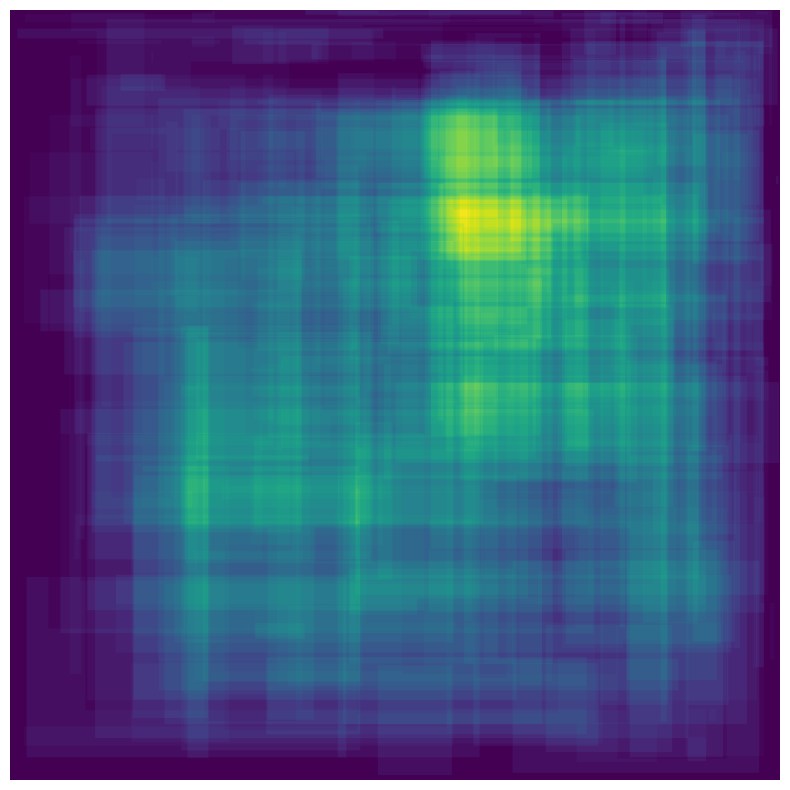

In [223]:


fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.set_xlim(0,size)
ax.set_ylim(0, size)
ax.axis('off')

# colors = {'on':'yellow', 'off':'black','toggle':'blue'}
# for w, tl, br in inp:
#     # Create a Rectangle patch
#     rect = patches.Rectangle(tl, br[0]-tl[0], br[1]-tl[1], linewidth=1, edgecolor='gray', facecolor='gray', alpha=0.2)

#     # Add the patch to the Axes
#     ax.add_patch(rect)


ax.imshow(grid)

In [218]:
size = 10
grid = np.zeros((size, size))

grid = adjust(grid, (1,1), (2,2), 1)

print(grid)
grid = adjust(grid, (2,2), (5,2), -1)
print(grid)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
grid